In [1]:
######################################################################################################### 
# Import all necessary numpy, scipy, pandas, seaborn, matplotlib, dmatrices and sklearn functions       #
######################################################################################################### 
#
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
######################################################################################################### 
# Read in 2013 Deparment of Health Survey                                                               #
######################################################################################################### 
#
total_survey = pd.read_csv('/Users/jspath/Desktop/DSI-SF-4-jspath9/projects/capstone/data/NSDUH-2013-DS0001-data-excel.tsv', sep='\t')

In [3]:
total_survey.shape

(55160, 3141)

In [4]:
######################################################################################################### 
# Restrict dataframe from 3100 fields to 29                                                             #
######################################################################################################### 
#
alcohol_fields = total_survey[['ALCEVER', 'AGE2', 'SERVICE', 'COMBATPY', 'HEALTH', 'IRSEX', 'IRMARIT',
                      'NEWRACE2', 'EDUCCAT2', 'WRKOCUP2', 'COUTYP2', 'ALCCUTDN',
                      'ALCREC', 'ALCYRTOT', 'ALCDAYS','DR5DAY', 'IRALCRC', 'IRALCFY', 'IRALCFM', 'IRALCAGE',
                      'BINGEDRK', 'ALCAVGM', 'RK5ALWK', 'ALCLIMIT', 'ABODALC', 'BOOKED', 
                      'TXILALEV','SNRLGSVC']]

In [5]:
alcohol_fields.shape

(55160, 28)

In [6]:
######################################################################################################### 
#  Create two dataframes - one for alcohol drinkers and one for for who have never consumed alcohol     #
######################################################################################################### 
#
non_alcohol_fields = alcohol_fields[alcohol_fields['ALCEVER'] == 2]
alcohol_fields = alcohol_fields[alcohol_fields['ALCEVER'] == 1]
non_alcohol_fields = non_alcohol_fields.drop('ALCEVER', 1)
alcohol_fields = alcohol_fields.drop('ALCEVER', 1)

In [100]:
alcohol_fields.shape

(38137, 27)

In [101]:
non_alcohol_fields.shape

(17005, 27)

In [7]:
######################################################################################################### 
#  Define a dictionary enabling the columns to be renamed                                               #
######################################################################################################### 
#
renamedict = dict(ALVER='ever_drank',
    ALCREC='time_last_drink',
    ALCYRTOT='d_drnk_last_yr',
    ALCDAYS='d_drnk_1_last_mo',
    DR5DAY='d_drnk_5_last_mo',
    IRALCRC='alc_recency',
    IRALCFY='days_past_yr',
    IRALCFM='days_past_mo',
    IRALCAGE='age_first_use',
    BINGEDRK='binge_past_mo',
    ALCAVGM='drnks_past_mo',
    RK5ALWK='rsk_5_or_more_wk',
    ALCLIMIT='limits_past_yr',
    ALCCUTDN='try_cut_down_yr',
    ABODALC='alc_depend_yr',
    BOOKED='ever_arrested',
    TXILALEV='ever_treated',
    SNRLGSVC='church_past_yr',
    AGE2='age',
    SERVICE='military_service',
    COMBATPY='combat_zone',
    HEALTH='health',
    IRSEX='gender',
    IRMARIT='marital_status',
    NEWRACE2='race',
    EDUCCAT2='education_level',
    WRKOCUP2='work_type',
    COUTYP2='metro_size')

In [8]:
######################################################################################################### 
#  Rename the columns for the alcohol dataframe to a more user-friend                                   #
######################################################################################################### 
#
alcohol_fields.rename(columns=renamedict, inplace=True)
alcohol_fields.head()

,age,military_service,combat_zone,health,gender,marital_status,race,education_level,work_type,metro_size,...,days_past_mo,age_first_use,binge_past_mo,drnks_past_mo,rsk_5_or_more_wk,limits_past_yr,alc_depend_yr,ever_arrested,ever_treated,church_past_yr
1,7,2,99,1,1,4,1,2,9999,1,...,2.0,13,1,30.0,2,2,0,1,0,1
2,6,2,99,2,1,4,1,5,10,3,...,93.0,16,0,-9.0,4,93,0,3,0,99
3,17,2,99,2,2,1,1,2,9999,1,...,2.0,18,0,-9.0,4,2,0,2,0,2
4,15,2,99,3,1,1,5,4,2,2,...,1.0,18,0,1.0,2,2,0,2,0,3
5,14,2,99,2,1,1,1,2,11,1,...,20.0,18,0,20.0,3,2,0,2,0,1


In [9]:
list(alcohol_fields.columns.values)

['age',
 'military_service',
 'combat_zone',
 'health',
 'gender',
 'marital_status',
 'race',
 'education_level',
 'work_type',
 'metro_size',
 'try_cut_down_yr',
 'time_last_drink',
 'd_drnk_last_yr',
 'd_drnk_1_last_mo',
 'd_drnk_5_last_mo',
 'alc_recency',
 'days_past_yr',
 'days_past_mo',
 'age_first_use',
 'binge_past_mo',
 'drnks_past_mo',
 'rsk_5_or_more_wk',
 'limits_past_yr',
 'alc_depend_yr',
 'ever_arrested',
 'ever_treated',
 'church_past_yr']

In [10]:
######################################################################################################### 
#  Rename the columns for the non-alcohol dataframe to a more user-friend                               #
######################################################################################################### 
#
non_alcohol_fields.rename(columns=renamedict, inplace=True)
non_alcohol_fields.head()

,age,military_service,combat_zone,health,gender,marital_status,race,education_level,work_type,metro_size,...,days_past_mo,age_first_use,binge_past_mo,drnks_past_mo,rsk_5_or_more_wk,limits_past_yr,alc_depend_yr,ever_arrested,ever_treated,church_past_yr
0,9,2,99,1,1,4,7,3,9999,2,...,91.0,991,0,-9.0,2,91,0,2,0,3
9,2,99,99,2,1,99,1,5,9999,1,...,91.0,991,0,-9.0,3,91,0,2,0,99
14,4,99,99,3,1,4,1,5,9999,3,...,91.0,991,0,-9.0,4,91,0,2,0,99
17,4,99,99,2,1,4,1,5,9,2,...,91.0,991,0,-9.0,4,91,0,2,0,99
18,6,2,99,2,2,4,7,5,9999,1,...,91.0,991,0,-9.0,3,91,0,2,0,99


In [107]:
######################################################################################################### 
#  The purpose of the next few cells is to conduct EDA on the fields in the dat                         #
######################################################################################################### 
#
a = alcohol_fields['d_drnk_last_yr'].value_counts()
a_frame = pd.DataFrame(a)
a_frame['index1'] = a_frame.index
a_frame = a_frame.loc[a_frame['index1'] > 400]
a_frame

,d_drnk_last_yr,index1
993,5528,993
998,335,998
994,205,994
985,118,985
997,61,997


In [387]:
a = alcohol_fields['d_drnk_5_last_mo'].value_counts()
a_frame = pd.DataFrame(a)
a_frame['index1'] = a_frame.index
a_frame = a_frame.loc[a_frame['index1'] > 40]
a_frame

,d_drnk_5_last_mo,index1
93,13740,93
98,683,98
85,219,85
94,200,94
97,70,97
80,49,80


In [109]:
alcohol_fields['alc_recency'].value_counts()


1    24037
2     8487
3     5613
Name: alc_recency, dtype: int64

In [110]:
a = alcohol_fields['rsk_5_or_more_wk'].value_counts()
a_frame = pd.DataFrame(a)
a_frame['index1'] = a_frame.index
a_frame = a_frame.loc[a_frame['index1'] > 40]
a_frame

,rsk_5_or_more_wk,index1
94,134,94
97,17,97
98,4,98
85,1,85


In [111]:
a = alcohol_fields['limits_past_yr'].value_counts()
a_frame = pd.DataFrame(a)
a_frame['index1'] = a_frame.index
a_frame = a_frame.loc[a_frame['index1'] > 40]
a_frame

,limits_past_yr,index1
93,11119,93
98,391,98
83,137,83
94,55,94
97,24,97
85,1,85


In [112]:
a = alcohol_fields['try_cut_down_yr'].value_counts()
a_frame = pd.DataFrame(a)
a_frame['index1'] = a_frame.index
a_frame = a_frame.loc[a_frame['index1'] > 40]
a_frame

,try_cut_down_yr,index1
93,11119,93
98,391,98
83,137,83
94,76,94
97,61,97
85,1,85


In [113]:
alcohol_fields['ever_arrested'].value_counts()

2     30708
1      6989
3       315
97       84
94       35
98        4
85        2
Name: ever_arrested, dtype: int64

In [114]:
alcohol_fields['ever_treated'].value_counts()

0    35356
1     2781
Name: ever_treated, dtype: int64

In [115]:
a = alcohol_fields['church_past_yr'].value_counts()
a_frame = pd.DataFrame(a)
a_frame['index1'] = a_frame.index
a_frame = a_frame.loc[a_frame['index1'] > 40]
a_frame

,church_past_yr,index1
99,5666,99
97,135,97
94,77,94
98,4,98
85,2,85


In [116]:
alcohol_fields['age'].value_counts()

15    6791
11    4234
12    4203
16    3511
14    2590
13    2333
10    1975
17    1916
6     1827
9     1772
8     1601
7     1545
5     1506
4     1099
3      693
2      374
1      167
Name: age, dtype: int64

In [117]:
alcohol_fields['military_service'].value_counts()

2     32337
99     3839
1      1944
85       16
94        1
Name: military_service, dtype: int64

In [118]:
a = alcohol_fields['combat_zone'].value_counts()
a_frame = pd.DataFrame(a)
a_frame['index1'] = a_frame.index
a_frame = a_frame.loc[a_frame['index1'] > 40]
a_frame

,combat_zone,index1
99,36664,99
85,16,85
94,3,94
98,2,98
97,2,97


In [119]:
alcohol_fields['health'].value_counts()

2     15491
3      9948
1      9302
4      2838
5       552
94        5
97        1
Name: health, dtype: int64

In [120]:
alcohol_fields['marital_status'].value_counts()

4     21609
1     11347
3      3212
99     1234
2       735
Name: marital_status, dtype: int64

In [121]:
alcohol_fields['race'].value_counts()

1    24008
7     6134
2     4628
6     1366
5     1277
3      529
4      195
Name: race, dtype: int64

In [122]:
alcohol_fields['education_level'].value_counts()

3    10264
2     9945
4     7912
5     5666
1     4350
Name: education_level, dtype: int64

In [123]:
a = alcohol_fields['work_type'].value_counts()
a_frame = pd.DataFrame(a)
a_frame['index1'] = a_frame.index
a_frame = a_frame.loc[a_frame['index1'] > 1000]
a_frame

,work_type,index1
9999,13804,9999
9990,26,9990
9997,16,9997
9998,11,9998


In [11]:
######################################################################################################### 
#  Define a data dictionary that is to be used to transform many of the imputed values from the         #
#  origninal dataset                                                                                    #
######################################################################################################### 
#
transform = {
    "time_last_drink": {
        8: 2,
        9: 4,
        11: 1
    },
    "d_drnk_last_yr": {
        985: "impute",
        993: 0,
        994: "impute",
        997: "impute",
        997: "impute"
    },
    "d_drnk_1_last_mo": {
        85: "impute",
        93: 0,
        97: "impute",
        98: "impute"
    },
    "d_drnk_5_last_mo": {
        80: 0,
        85: "impute",
        93: 0,
        94: "impute",
        97: "impute",
        98: "impute"
    },
#     "alc_recency": {
#     },
     "days_past_yr": {
        993: 0,
     },
#     "days_past_mo": {
#     },
#     "age_first_use": {
#     },
#     "binge_past_mo": {
#     },
#     "drnks_past_mo": {
#     },
    "rsk_5_or_more_wk": {
        83: 0,
        85: "impute",
        93: 0,
        94: "impute",
        97: "impute",
        98: "impute"
    },
    "limits_past_yr": {
        83: 0,
        85: "impute",
        93: 0,
        94: "impute",
        97: "impute",
        98: "impute"
    },
    "try_cut_down_yr": {
        83: 0,
        85: "impute",
        93: 0,
        94: "impute",
        97: "impute",
        98: "impute"
    },
#     "alc_depend_yr": {
#     },
    "ever_arrested": {
        3: 1,
        85: "impute",
        94: "impute",
        97: "impute",
        98: "impute"
    },
#     "ever_treated": {
#     },
    "church_past_yr": {
        3: 1,
        85: "impute",
        94: "impute",
        97: "impute",
        98: "impute",
        99: "impute"
    },
#     },
#     "age": {
#     },
    "military_service": {
        85: 'impute',
        94: 'impute',
        99: 'impute'
    },
    "combat_zone": {
        85: 'impute',
        94: 'impute',
        97: 'impute',
        98: 'impuate',
        99: 2
    },
    "health": {
        94: "impute",
        97: "impute"
    },
#     "gender": {
#     },
    "marital_status": {
        99: 4
    },
#     "race": {
#     },
#     "education_level": {
#     },
    "work_type": {
        9990: "impute",
        9997: "impute",
        9998: "impute",
        9999: 0
    }
#     "metro_size ": {
#     }
}

In [12]:
######################################################################################################### 
#  This function is used to transform many of the imputed values from the                               #
#  origninal dataset                                                                                    #
######################################################################################################### 
#
def transform_values(row):
    
    for variable, mapping in transform.items():
        
        for value, replacement in mapping.items():
            
            if row[variable] == value:
                
                row[variable] = replacement
                
    return row

In [13]:
######################################################################################################### 
#  Call to a function that is used to transform many of the imputed values from the                     #
#  origninal dataset                                                                                    #
######################################################################################################### 
#
alcohol = alcohol_fields.apply(transform_values, axis=1)

In [14]:
######################################################################################################### 
#  The next few cells are used to identify the number of rows that can be removed from the dataframe    #
#  due to the fact that values are not filled in or auto-skiipped in the survey                         #
######################################################################################################### 
#
test = alcohol.loc[alcohol['d_drnk_last_yr'] == 'impute']

In [15]:
test.shape

(384, 27)

In [ ]:
test = alcohol.loc[alcohol['d_drnk_1_last_mo'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['d_drnk_5_last_mo'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['rsk_5_or_more_wk'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['limits_past_yr'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['try_cut_down_yr'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['ever_arrested'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['church_past_yr'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['military_service'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['combat_zone'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['health'] == 'impute']

In [ ]:
test.shape

In [ ]:
test = alcohol.loc[alcohol['work_type'] == 'impute']

In [ ]:
test.shape

In [16]:
######################################################################################################### 
#  This mask is used to remove the rows that are empty or auto-skipped                                  #
######################################################################################################### 
#
alcohol_mask = ((alcohol.d_drnk_last_yr=='impute') | 
        (alcohol.d_drnk_1_last_mo=='impute') | 
        (alcohol.d_drnk_5_last_mo=='impute') |
        (alcohol.rsk_5_or_more_wk=='impute') |
        (alcohol.limits_past_yr=='impute') |
        (alcohol.try_cut_down_yr=='impute') |
        (alcohol.ever_arrested=='impute') |
        (alcohol.church_past_yr=='impute') |
        (alcohol.military_service=='impute') |
        (alcohol.combat_zone=='impute') | 
        (alcohol.health=='impute') |
        (alcohol.work_type=='impute')) 

In [17]:
alcohol.shape

(38137, 27)

In [18]:
######################################################################################################### 
#  This code removes all rowns that with missing data or auto-skipped answers                           #
######################################################################################################### 
#
alcohol_final = alcohol[~alcohol_mask]

In [19]:
alcohol_final.shape

(30900, 27)

In [20]:
######################################################################################################### 
# Define the features that need to be reversed in order for correlationa dn logistic regression to      # 
# work correctly.                                                                                       #
######################################################################################################### 
#
reverse_cols = ['time_last_drink',
    'alc_recency',
    'age_first_use',
    'ever_arrested'
]

In [21]:
######################################################################################################### 
# This code executes the reversal of all of the fields designated in above list                         # 
######################################################################################################### 
#
for rcols in reverse_cols:
    alcohol_final['r_' + rcols] = alcohol_final[rcols].map(lambda x: x* -1)

/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
######################################################################################################### 
# This cell either creates new binary features or modifies exisitng ones to be binary to support        #
# classification modeling via logistic regression.                                                      #
######################################################################################################### 
#
alcohol_final['age_first_use_bin'] = alcohol_final['age_first_use'].map(lambda x: 1 if x<17 else 0)
alcohol_final['health_bin'] = alcohol_final['health'].map(lambda x: 0 if x<4 else 1)
alcohol_final['r_alc_recency_bin'] = alcohol_final['r_alc_recency'].map(lambda x: 1 if x==-2 else 0)
alcohol_final['church_regular'] = alcohol_final['church_past_yr'].map(lambda x: 1 if x<5 else 0)
alcohol_final['age_bin'] = alcohol_final['age'].map(lambda x: 1 if x>13 else 0)
alcohol_final['gender'] = alcohol_final['gender'].map(lambda x: 0 if x==1 else 1)
alcohol_final['military_service'] = alcohol_final['military_service'].map(lambda x: 1 if x==1 else 0)
alcohol_final['combat_zone'] = alcohol_final['combat_zone'].map(lambda x: 1 if x==1 else 0)
alcohol_final['rsk_5_or_more_wk_bin'] = alcohol_final['rsk_5_or_more_wk'].map(lambda x: 0 if x==1 else 1)
alcohol_final['marital_status_bin'] = alcohol_final['marital_status'].map(lambda x: 0 if x==1 else 1)
alcohol_final['race_white'] = alcohol_final['race'].map(lambda x: 0 if x==1 else 1)
alcohol_final['education_college'] = alcohol_final['education_level'].map(lambda x: 0 if x==3 or x==4 else 1)
alcohol_final['work_type_office'] = alcohol_final['work_type'].map(lambda x: 0 if x<10 else 1)
alcohol_final['rural'] = alcohol_final['metro_size'].map(lambda x: 1 if x==3 else 0)

/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [32]:
alcohol_final['age_first_use'].value_counts()

16    5240
18    4896
15    3764
17    3253
21    2900
14    2378
13    1702
19    1534
20    1253
12    1167
22     478
10     360
25     273
11     264
23     244
8      170
24     138
9      136
30     103
7       91
6       79
5       67
26      54
27      39
40      37
4       37
35      32
28      32
3       23
2       23
29      21
32      21
50      10
34      10
33       9
36       9
1        7
47       5
45       5
38       5
42       4
31       4
37       3
43       3
49       2
39       2
48       2
61       2
41       1
56       1
58       1
71       1
65       1
75       1
44       1
64       1
55       1
Name: age_first_use, dtype: int64

In [33]:
######################################################################################################### 
# Convert all variables to integer to simplify evaluation of coefficients and make Patsy execution      #
# more straightforward.                                                                                 #
######################################################################################################### 
#
alcohol_final['age'] = alcohol_final['age'].map(lambda x: int(x))
alcohol_final['military_service'] = alcohol_final['military_service'].map(lambda x: int(x))
alcohol_final['combat_zone'] = alcohol_final['combat_zone'].map(lambda x: int(x))
alcohol_final['gender'] = alcohol_final['gender'].map(lambda x: int(x))
alcohol_final['marital_status'] = alcohol_final['marital_status'].map(lambda x: int(x))
alcohol_final['health'] = alcohol_final['health'].map(lambda x: int(x))
alcohol_final['race'] = alcohol_final['race'].map(lambda x: int(x))
alcohol_final['education_level'] = alcohol_final['education_level'].map(lambda x: int(x))
alcohol_final['work_type'] = alcohol_final['work_type'].map(lambda x: int(x))
alcohol_final['metro_size'] = alcohol_final['metro_size'].map(lambda x: int(x))
alcohol_final['try_cut_down_yr'] = alcohol_final['try_cut_down_yr'].map(lambda x: int(x))
alcohol_final['time_last_drink'] = alcohol_final['time_last_drink'].map(lambda x: int(x))
alcohol_final['d_drnk_last_yr'] = alcohol_final['d_drnk_last_yr'].map(lambda x: int(x))
alcohol_final['d_drnk_1_last_mo'] = alcohol_final['d_drnk_1_last_mo'].map(lambda x: int(x))
alcohol_final['d_drnk_5_last_mo'] = alcohol_final['d_drnk_5_last_mo'].map(lambda x: int(x))
alcohol_final['alc_recency'] = alcohol_final['alc_recency'].map(lambda x: int(x))
alcohol_final['days_past_yr'] = alcohol_final['days_past_yr'].map(lambda x: int(x))
alcohol_final['days_past_mo'] = alcohol_final['days_past_mo'].map(lambda x: int(x))
alcohol_final['age_first_use'] = alcohol_final['age_first_use'].map(lambda x: int(x))
alcohol_final['binge_past_mo'] = alcohol_final['binge_past_mo'].map(lambda x: int(x))
alcohol_final['drnks_past_mo'] = alcohol_final['drnks_past_mo'].map(lambda x: int(x))
alcohol_final['rsk_5_or_more_wk'] = alcohol_final['rsk_5_or_more_wk'].map(lambda x: int(x))
alcohol_final['rsk_5_or_more_wk_bin'] = alcohol_final['rsk_5_or_more_wk_bin'].map(lambda x: int(x))
alcohol_final['limits_past_yr'] = alcohol_final['limits_past_yr'].map(lambda x: int(x))
alcohol_final['alc_depend_yr'] = alcohol_final['alc_depend_yr'].map(lambda x: int(x))
alcohol_final['ever_arrested'] = alcohol_final['ever_arrested'].map(lambda x: int(x))
alcohol_final['ever_treated'] = alcohol_final['ever_treated'].map(lambda x: int(x))
alcohol_final['church_past_yr'] = alcohol_final['church_past_yr'].map(lambda x: int(x))
alcohol_final['r_time_last_drink'] = alcohol_final['r_time_last_drink'].map(lambda x: int(x))
alcohol_final['r_alc_recency'] = alcohol_final['r_alc_recency'].map(lambda x: int(x))
alcohol_final['r_age_first_use'] = alcohol_final['r_age_first_use'].map(lambda x: int(x))
alcohol_final['r_ever_arrested'] = alcohol_final['r_ever_arrested'].map(lambda x: int(x))

/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [34]:
alcohol_final.dtypes

age                     int64
military_service        int64
combat_zone             int64
health                  int64
gender                  int64
marital_status          int64
race                    int64
education_level         int64
work_type               int64
metro_size              int64
try_cut_down_yr         int64
time_last_drink         int64
d_drnk_last_yr          int64
d_drnk_1_last_mo        int64
d_drnk_5_last_mo        int64
alc_recency             int64
days_past_yr            int64
days_past_mo            int64
age_first_use           int64
binge_past_mo           int64
drnks_past_mo           int64
rsk_5_or_more_wk        int64
limits_past_yr          int64
alc_depend_yr           int64
ever_arrested           int64
ever_treated            int64
church_past_yr          int64
r_time_last_drink       int64
r_alc_recency           int64
r_age_first_use         int64
r_ever_arrested         int64
age_first_use_bin       int64
health_bin              int64
r_alc_rece

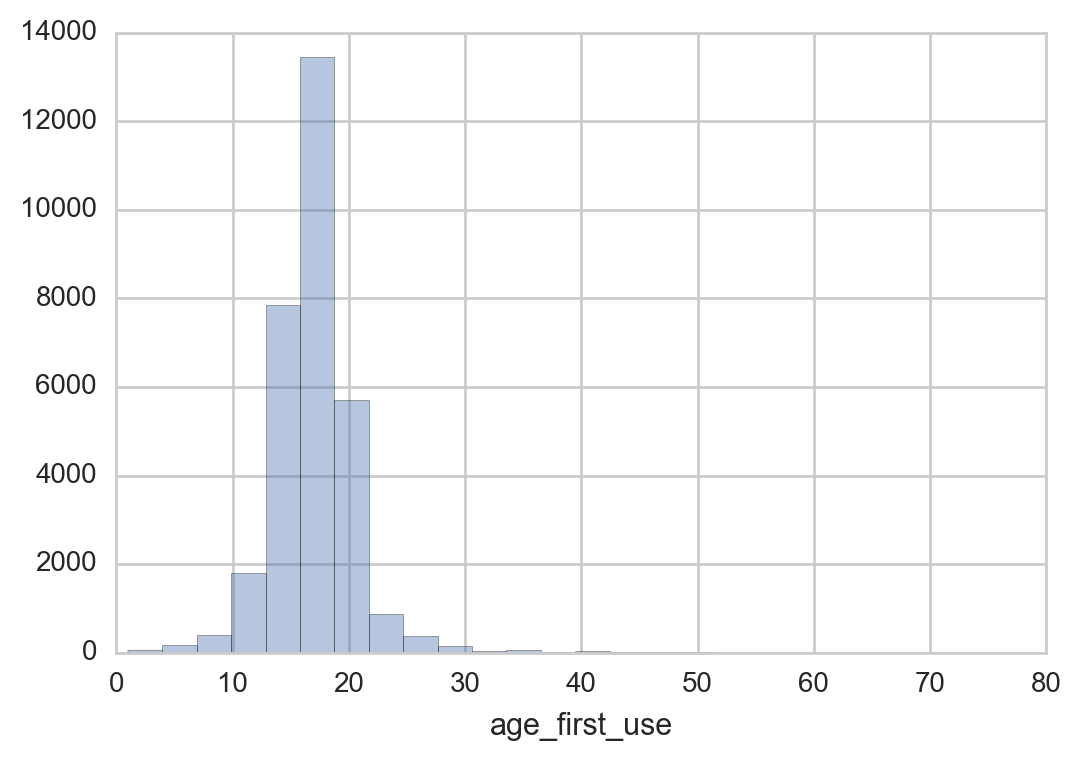

In [32]:
######################################################################################################### 
# EDA - distribution of when started drinking                                                           # 
######################################################################################################### 
#
sns.distplot(alcohol_final.age_first_use, kde=False, bins=25)

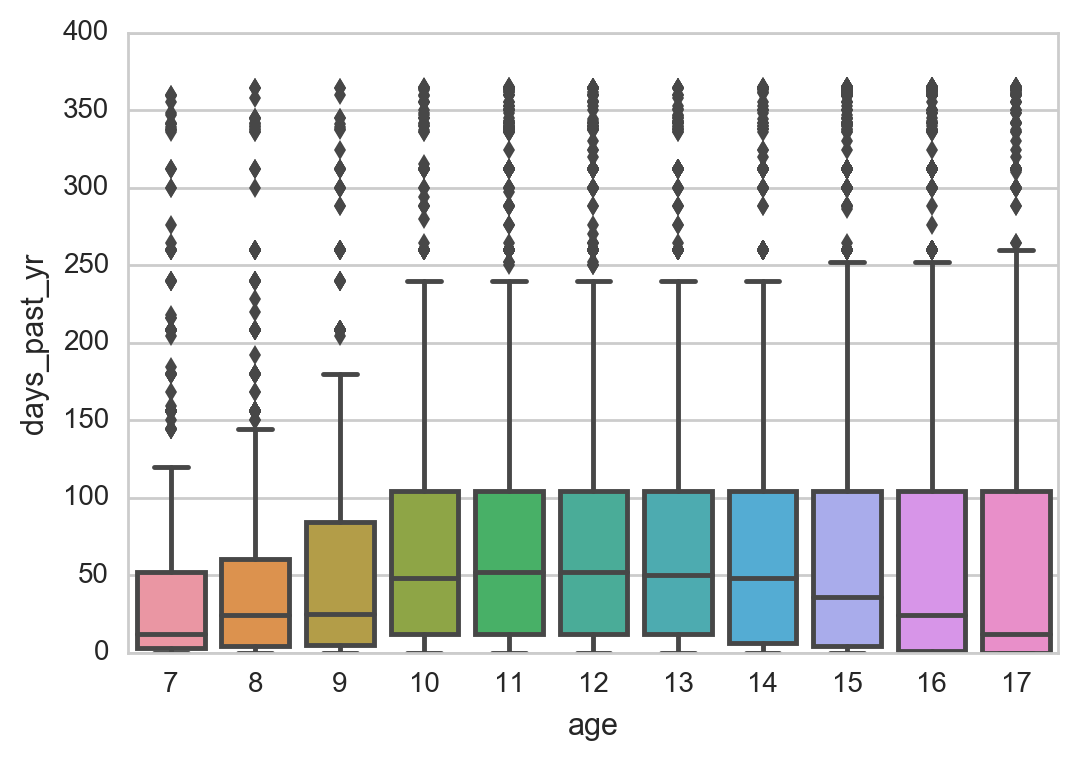

In [351]:
######################################################################################################### 
# EDA - age group box plot                                                                              # 
######################################################################################################### 
#
sns.boxplot(alcohol_final.age, alcohol_final.days_past_yr)

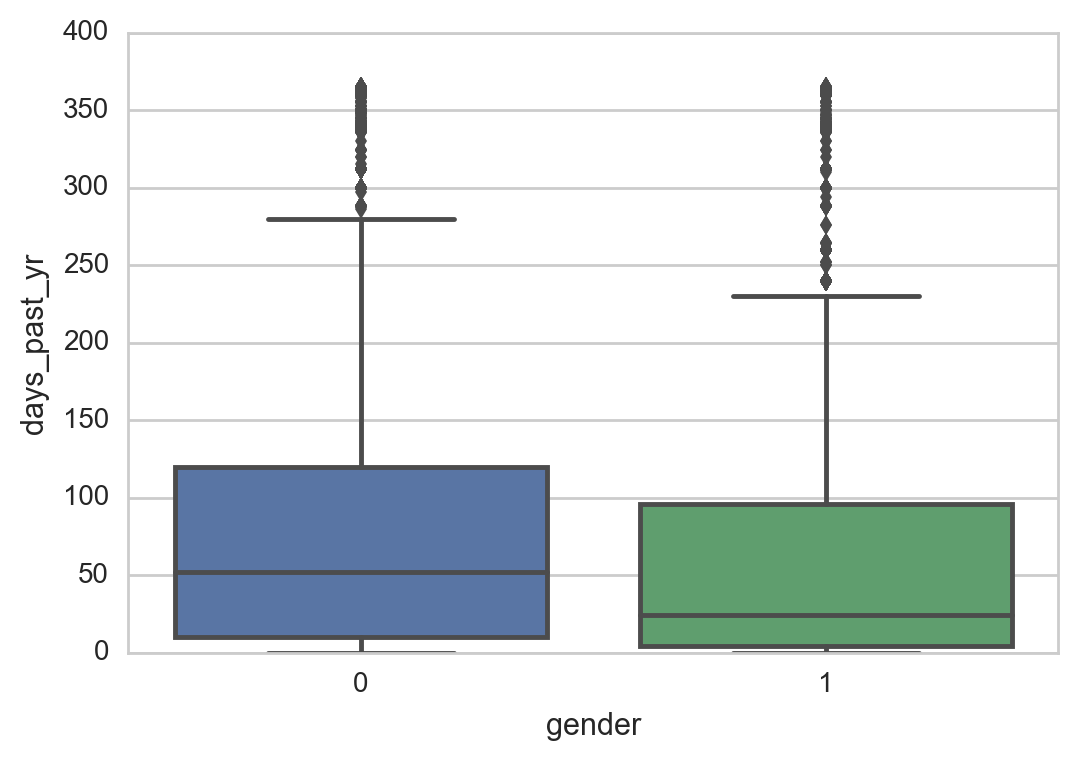

In [350]:
######################################################################################################### 
# EDA gender box plot                                                                                   # 
######################################################################################################### 
#
sns.boxplot(alcohol_final.gender, alcohol_final.days_past_yr)

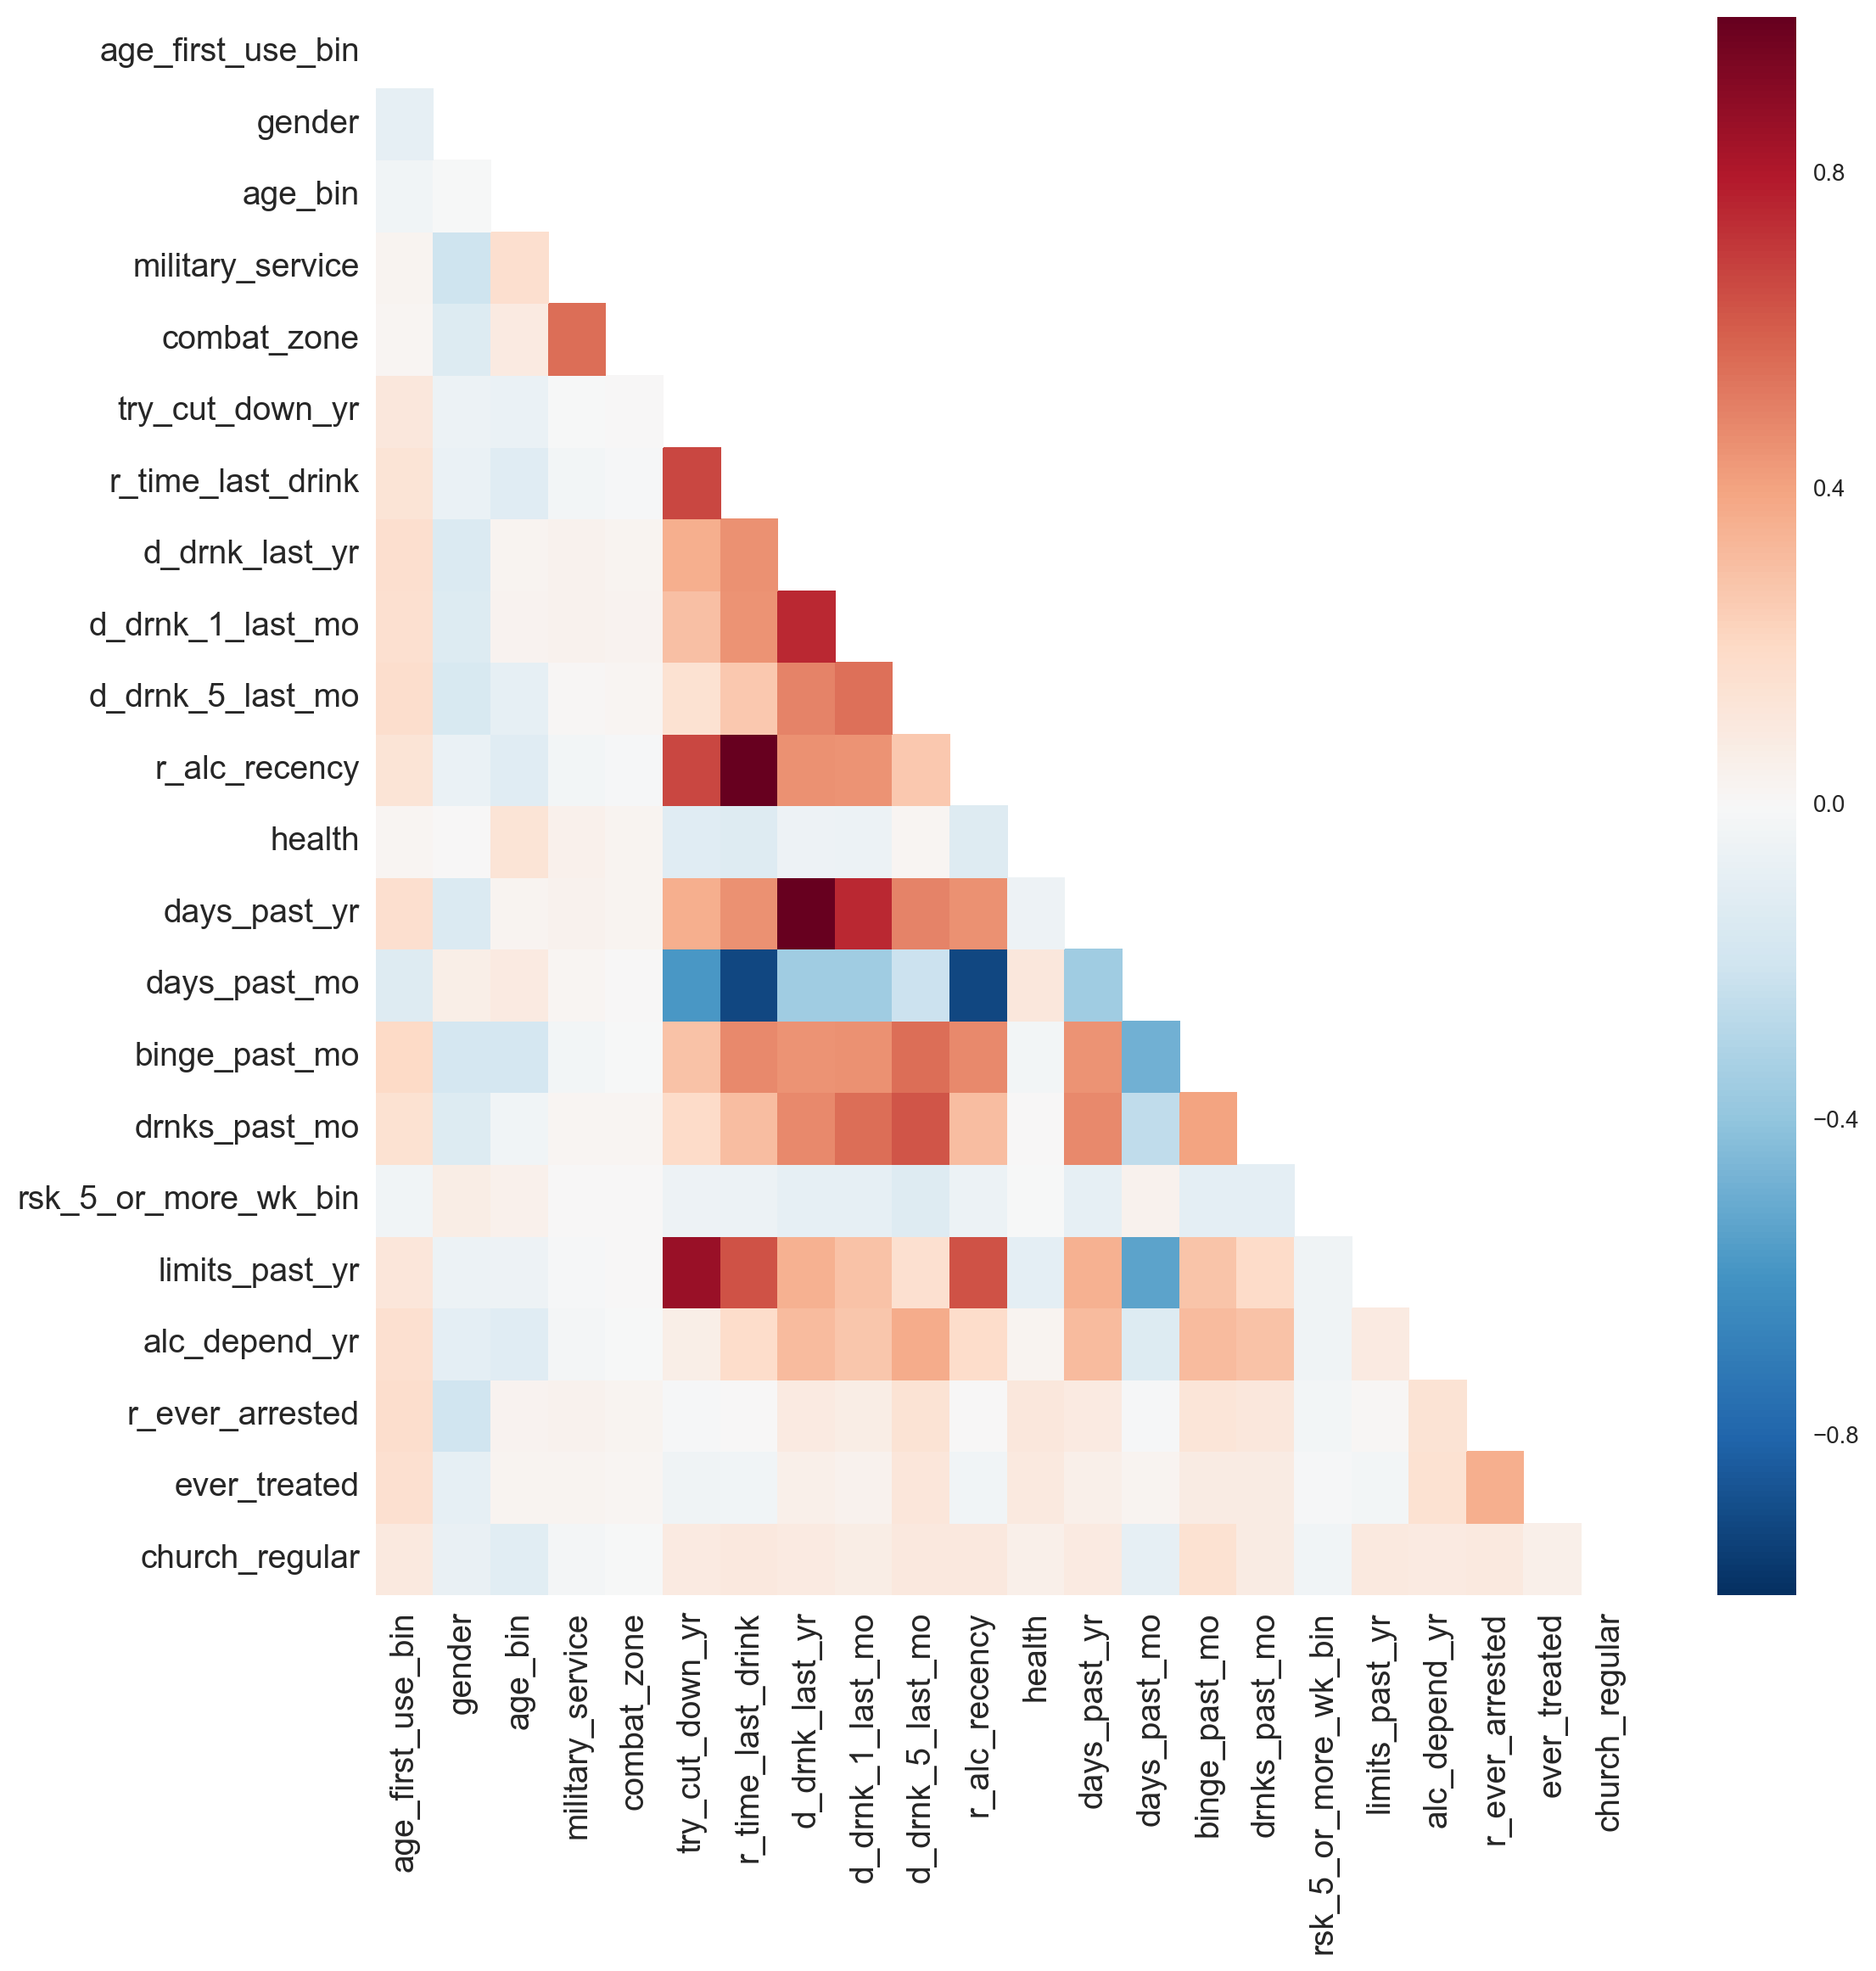

In [35]:
######################################################################################################### 
# Heat Map                                                                                              # 
######################################################################################################### 
#

model_cols = ['age_first_use_bin', 'gender', 'age_bin', 'military_service', 'combat_zone', 
              'try_cut_down_yr', 'r_time_last_drink', 'd_drnk_last_yr', 'd_drnk_1_last_mo', 
              'd_drnk_5_last_mo', 'r_alc_recency', 'health', 'days_past_yr', 'days_past_mo',
              'binge_past_mo', 'drnks_past_mo', 'rsk_5_or_more_wk_bin', 'limits_past_yr',
              'alc_depend_yr', 'r_ever_arrested', 'ever_treated', 'church_regular'] 

numeric_cols = [col for col in model_cols]

alcohol_subset = alcohol_final[numeric_cols]
corrs = alcohol_subset.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(12,12))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()


In [282]:
######################################################################################################### 
# Create multiple dataframes to support multikple logistic regressions                                  # 
######################################################################################################### 
#
alcohol_final_age = alcohol_final
alcohol_final_gender = alcohol_final
alcohol_final_age_first = alcohol_final

In [ ]:
######################################################################################################### 
# The following target variables did not provide significant performance and were dropped from          #
# technical report:                                                                                     #    
#   - health_bin - health (good or bad)                                                                 #
#   - r_alc_recency_bin - whether or not a particiapnt has had a drink in the past 30 days              #
#   - rural - Predicting if the survey participant resides outside a metropolitan area                  #
#   - ever_arrested - predicting if a survey participant has ever been arrested                         #
#   - ever_treated - predicting if a survey participant has ever been treated for alcohol abuse         #
#   - alc_depend_yr - Predicting if a survey participant has had a dependence on alcohol within the     #
#     past year                                                                                         #
#   - work_type_office - prediccting if a survey participant works in an office                         #
#   - binge_past_mo - preicting if a survey participant had a binge driking session in the past month   #
#   - education_college - Predicting if a survey participant has attended college                       #
#   - marital_status_bin - Predicing whether a survey particiapnt is married                            #
#   - race_white - predicting whether or not a survey participant is white or non-white                 #
#   - church_regular - predicting whether or not a survey participant is a regular church going         #
#########################################################################################################

In [1005]:
######################################################################################################### 
# The following 3 models will be used in the final report                                               # 
#   - age_first_use_bin - Predicting if a survey participant had their first drink prior to their 17th  # 
#     birthday                                                                                          # 
#   - age_bin - predicting if a survey participant is younger than 30 years old                         #
#   - gender - predicting the gender of a survey participant                                            #
#########################################################################################################

In [1006]:
######################################################################################################### 
# Predicting if a survey participant had their first drink prior to their 17th birthday                 # 
#########################################################################################################

In [429]:
######################################################################################################### 
#  Select the target variable                                                                           #
######################################################################################################### 
#
target_variable = "age_first_use_bin"
target_classes = alcohol_final_age_first[target_variable].unique().tolist()

In [430]:
target_classes

[1, 0]

In [431]:
alcohol_final_age_first['age_first_use_bin'].value_counts()

1    15508
0    15392
Name: age_first_use_bin, dtype: int64

In [432]:
######################################################################################################### 
#  Index the target variable                                                                            #
######################################################################################################### 
#
alcohol_final_recency[target_variable] = alcohol_final_recency[target_variable].map(lambda value: target_classes.index(value))

In [433]:
######################################################################################################### 
#  Set up Patsy with target, predictors and parmameters                                                 #
######################################################################################################### 
#
y, X = dmatrices(target_variable + """ ~ military_service + combat_zone + try_cut_down_yr + r_time_last_drink + 
                                    d_drnk_last_yr + d_drnk_1_last_mo + d_drnk_5_last_mo + r_alc_recency + 
                                    health +
                                    days_past_yr + days_past_mo + binge_past_mo + drnks_past_mo +
                                    rsk_5_or_more_wk_bin + limits_past_yr + alc_depend_yr + r_ever_arrested + ever_treated +
                                    church_regular - 1""", data = alcohol_final, return_type="dataframe")

In [434]:
######################################################################################################### 
#  Invoke Patsy                                                                                         #
######################################################################################################### 
#
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [435]:
######################################################################################################### 
#  Define the training and testing variables                                                            #
######################################################################################################### 
#
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.33, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [436]:
######################################################################################################### 
#  Test #1 - what is the mean of the target variable                                                    #
######################################################################################################### 
#
np.mean(y_test)

0.50279493968814359

In [437]:
######################################################################################################### 
#  Instantiate and set up parameters for stachastic gradiant desc                                       #
######################################################################################################### 
#
params = {
    'loss':['log'],
    'penalty':['l2'],
    'alpha':np.logspace(-4,4,200)
}

sgdc = SGDClassifier()
sgdc_gs = GridSearchCV(sgdc, params, cv=5, verbose=1)

In [438]:
######################################################################################################### 
#  Fit the model                                                                                        #
######################################################################################################### 
#
sgdc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   12.2s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   15.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'loss': ['log'], 'alpha': array([  1.00000e-04,   1.09699e-04, ...,   9.11589e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [439]:
######################################################################################################### 
# The age first use model is showing significant peform                                                 # 
#########################################################################################################
print sgdc_gs.best_params_
best_model = sgdc_gs.best_estimator_
print best_model.score(X_test, y_test)

{'penalty': 'l2', 'alpha': 0.016257556664437952, 'loss': 'log'}
0.638324997548


In [440]:
######################################################################################################### 
#  Predict the model                                                                                    #
######################################################################################################### 
#
started_predictions = best_model.predict(X_test)
started_prob_predictions = best_model.predict_proba(X_test)
#alcohol_final_age_first['X_test'] = predictions

In [441]:
######################################################################################################### 
#  Show the classification report                                                                       #
######################################################################################################### 
#
print classification_report(started_predictions, y_test)

             precision    recall  f1-score   support

        0.0       0.71      0.62      0.66      5798
        1.0       0.57      0.66      0.61      4399

avg / total       0.65      0.64      0.64     10197



### Look at model coefficients

Take the model and extract the coefficients like so:


In [442]:
model_coefs = best_model.coef_[0]
print model_coefs.shape

(19,)


Put the coefficients and the variables in a dataframe together:

In [443]:
coefs_vars = pd.DataFrame({
        'coefs':model_coefs,
        'variable':X.columns
    })

Put the absolute value of the coefficients in the dataframe, that way you can sort the dataframe by the magnitude of the coefficients.

In [444]:
coefs_vars['abs_coefs'] = np.abs(coefs_vars.coefs)

Sort the dataframe by the absolute value of the coefficients to see what is most impactful (positive OR negative).


In [445]:
coefs_vars.sort_values('abs_coefs', ascending=False, inplace=True)
coefs_vars.head(10)

,coefs,variable,abs_coefs
16,0.233291,r_ever_arrested,0.233291
17,0.212678,ever_treated,0.212678
15,0.145337,alc_depend_yr,0.145337
11,0.129280,binge_past_mo,0.129280
18,0.098207,church_regular,0.098207
12,0.093009,drnks_past_mo,0.093009
6,0.074342,d_drnk_5_last_mo,0.074342
2,0.072390,try_cut_down_yr,0.072390
14,0.043243,limits_past_yr,0.043243
5,0.038085,d_drnk_1_last_mo,0.038085


Also sort by the original `coefs` columns if you want to see the most positive or the most negative:

In [446]:
coefs_vars.sort_values('coefs', ascending=False, inplace=True)
coefs_vars.head()

,coefs,variable,abs_coefs
16,0.233291,r_ever_arrested,0.233291
17,0.212678,ever_treated,0.212678
15,0.145337,alc_depend_yr,0.145337
11,0.129280,binge_past_mo,0.129280
18,0.098207,church_regular,0.098207


In [447]:
coefs_vars.tail()

,coefs,variable,abs_coefs
3,-0.006525,r_time_last_drink,0.006525
13,-0.010875,rsk_5_or_more_wk_bin,0.010875
0,-0.031457,military_service,0.031457
10,-0.033289,days_past_mo,0.033289
1,-0.037483,combat_zone,0.037483


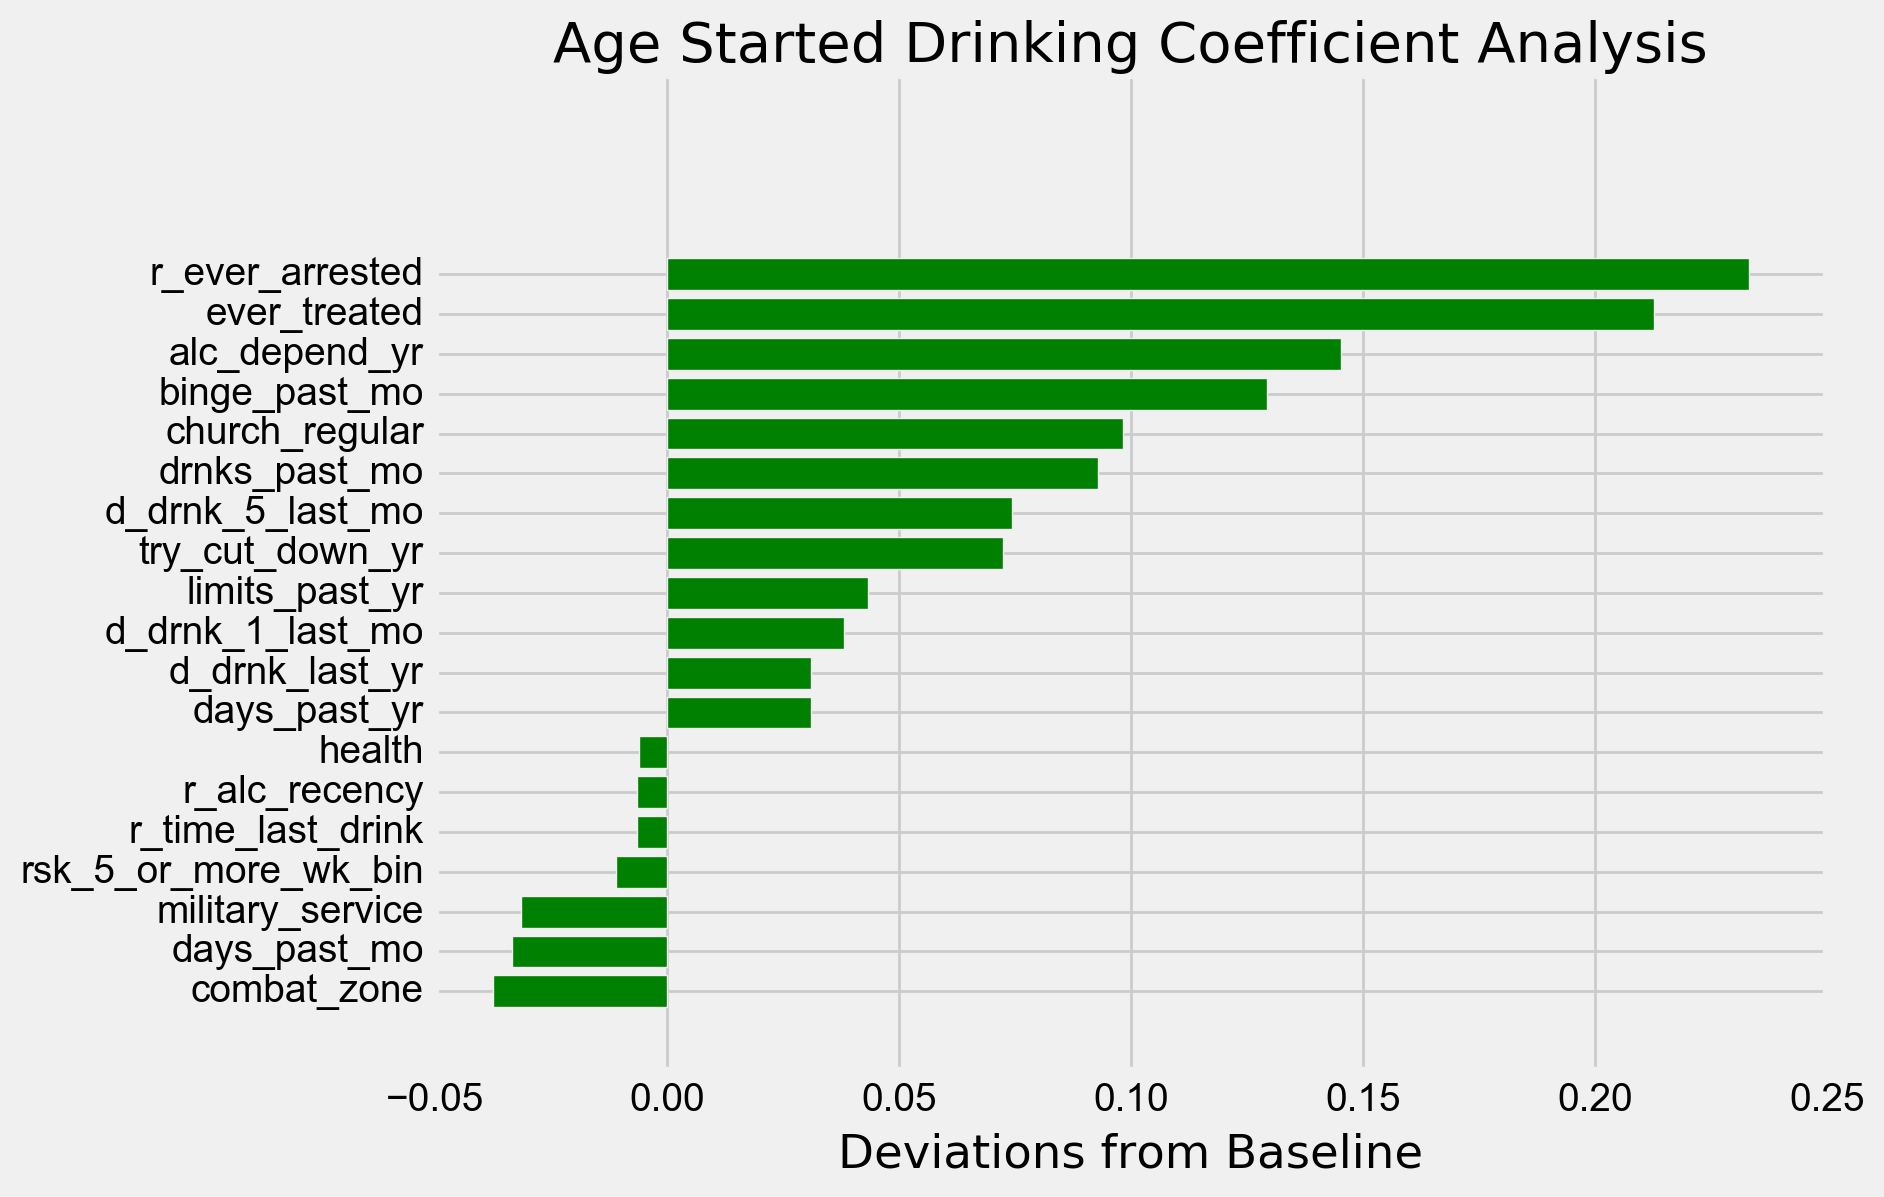

In [453]:
######################################################################################################### 
#  Display the coefficients                                                                             #
######################################################################################################### 
#
import matplotlib.pyplot as plt
plt.rcdefaults()

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Example data
coefs_to_plot = (coefs_vars.variable)
y_pos = np.arange(len(coefs_to_plot))
difference = coefs_vars["coefs"]

ax.barh(y_pos, difference, align='center',
       color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(coefs_to_plot)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Deviations from Baseline')
ax.set_title('Age Started Drinking Coefficient Analysis')

#plt.show()

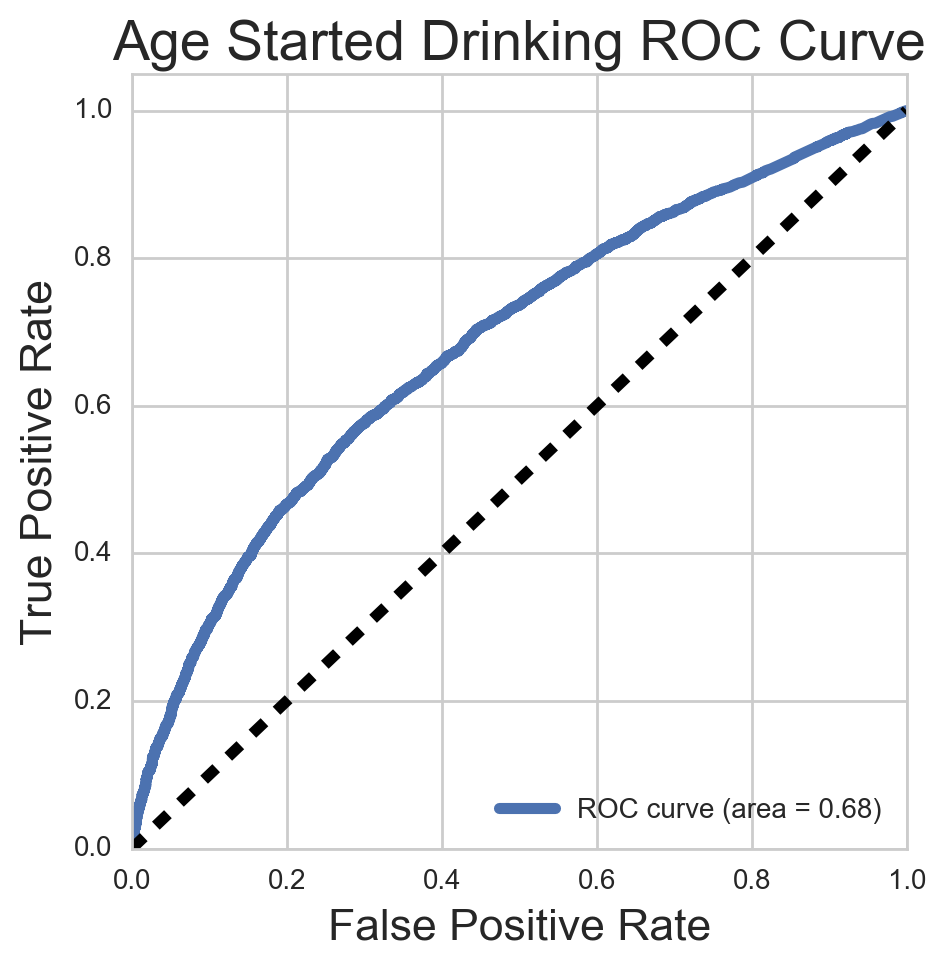

In [402]:
######################################################################################################### 
#  Display the ROC Curve                                                                                #
######################################################################################################### 
#


from sklearn.metrics import roc_curve, auc

# # Get out the predicted probabilities for the X observation matrix
y_pp = started_prob_predictions[:, 1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
#fpr, tpr, _ = roc_curve(y, y_pp[:, 1])
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Age Started Drinking ROC Curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [1046]:
######################################################################################################### 
# Predicting the gender of a survey participant                                                         # 
#########################################################################################################

In [454]:
######################################################################################################### 
#  Select the target variable                                                                           #
######################################################################################################### 
#
target_variable = "gender"
target_classes = alcohol_final_gender[target_variable].unique().tolist()

In [455]:
target_classes

[0, 1]

In [456]:
alcohol_final_gender['gender'].value_counts()

1    16503
0    14397
Name: gender, dtype: int64

In [457]:
######################################################################################################### 
#  Index the target variable                                                                            #
######################################################################################################### 
#
alcohol_final_gender[target_variable] = alcohol_final_gender[target_variable].map(lambda value: target_classes.index(value))

/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [458]:
######################################################################################################### 
#  Set up Patsy with target, predictors and parmameters                                                 #
######################################################################################################### 
#
y, X = dmatrices(target_variable + """ ~ military_service + combat_zone + try_cut_down_yr + r_time_last_drink + 
                                    d_drnk_last_yr + d_drnk_1_last_mo + d_drnk_5_last_mo + r_alc_recency + 
                                    health +
                                    days_past_yr + days_past_mo + r_age_first_use + binge_past_mo + drnks_past_mo +
                                    rsk_5_or_more_wk_bin + limits_past_yr + alc_depend_yr + r_ever_arrested + ever_treated +
                                    church_past_yr - 1""", data = alcohol_final, return_type="dataframe")

In [459]:
######################################################################################################### 
#  Invoke Patsy                                                                                         #
######################################################################################################### 
#
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [460]:
######################################################################################################### 
#  Define the training and testing variables                                                            #
######################################################################################################### 
#
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.33, random_state=42)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [461]:
######################################################################################################### 
#  Test #1 - what is the mean of the target variable                                                    #
######################################################################################################### 
#
np.mean(y_test)

0.53604001176816707

In [462]:
######################################################################################################### 
#  Instantiate and set up parameters for stachastic gradiant desc                                       #
######################################################################################################### 
#
params = {
    'loss':['log'],
    'penalty':['l2'],
    'alpha':np.logspace(-4,4,200)
}

sgdc = SGDClassifier()
sgdc_gs = GridSearchCV(sgdc, params, cv=5, verbose=1)

In [463]:
######################################################################################################### 
#  Fit the model                                                                                        #
######################################################################################################### 
#
sgdc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   14.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'loss': ['log'], 'alpha': array([  1.00000e-04,   1.09699e-04, ...,   9.11589e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [464]:
######################################################################################################### 
# The gender model is showing significant peforman                                                      # 
#########################################################################################################
print sgdc_gs.best_params_
best_model = sgdc_gs.best_estimator_
print best_model.score(X_test, y_test)

{'penalty': 'l2', 'alpha': 0.012315506032928261, 'loss': 'log'}
0.654996567618


In [420]:
######################################################################################################### 
#  Predict the model                                                                                    #
######################################################################################################### 
#
gender_predictions = best_model.predict(X_test)
gender_prob_predictions = best_model.predict_proba(X_test)
#alcohol_final_gender['X_test'] = predictions

In [465]:
######################################################################################################### 
#  Show the classification report                                                                       #
######################################################################################################### 
#
print classification_report(gender_predictions, y_test)

             precision    recall  f1-score   support

        0.0       0.48      0.69      0.57      3347
        1.0       0.81      0.64      0.72      6850

avg / total       0.70      0.66      0.67     10197



In [466]:
######################################################################################################### 
#  Look at model coefficients                                                                           #
#  Take the model and extract the coefficients like so:                                                 #
######################################################################################################### 
#
model_coefs = best_model.coef_[0]
print model_coefs.shape

(20,)


In [467]:
######################################################################################################### 
#  Put the coefficients and the variables in a dataframe together:                                      #
######################################################################################################### 
#
coefs_vars = pd.DataFrame({
        'coefs':model_coefs,
        'variable':X.columns
    })

In [468]:
alcohol_final.military_service.unique()

array([1, 0])

In [469]:
######################################################################################################### 
#  Put the absolute value of the coefficients in the dataframe, that way you can sort the               #
#  dataframe by the magnitude of the coefficients.                                                      #
######################################################################################################### 
#
coefs_vars['abs_coefs'] = np.abs(coefs_vars.coefs)

In [470]:
######################################################################################################### 
#  Sort the dataframe by the absolute value of the coefficients to see what is most impactful           #
#  (positive OR negative).                                                                              #
######################################################################################################### 
#
coefs_vars.sort_values('abs_coefs', ascending=False, inplace=True)
coefs_vars.head(10)

,coefs,variable,abs_coefs
0,0.405732,military_service,0.405732
17,-0.323351,r_ever_arrested,0.323351
12,-0.197074,binge_past_mo,0.197074
1,-0.148078,combat_zone,0.148078
19,0.130502,church_past_yr,0.130502
8,0.101881,health,0.101881
13,-0.098870,drnks_past_mo,0.098870
11,-0.086810,r_age_first_use,0.086810
14,0.083583,rsk_5_or_more_wk_bin,0.083583
6,-0.070650,d_drnk_5_last_mo,0.070650


In [471]:
######################################################################################################### 
#  Also sort by the original `coefs` columns if you want to see the most positive or the most negative  #
######################################################################################################### 
#
coefs_vars.sort_values('coefs', ascending=False, inplace=True)
coefs_vars.head()

,coefs,variable,abs_coefs
0,0.405732,military_service,0.405732
19,0.130502,church_past_yr,0.130502
8,0.101881,health,0.101881
14,0.083583,rsk_5_or_more_wk_bin,0.083583
3,0.021880,r_time_last_drink,0.021880


In [472]:
coefs_vars.tail()

,coefs,variable,abs_coefs
11,-0.086810,r_age_first_use,0.086810
13,-0.098870,drnks_past_mo,0.098870
1,-0.148078,combat_zone,0.148078
12,-0.197074,binge_past_mo,0.197074
17,-0.323351,r_ever_arrested,0.323351


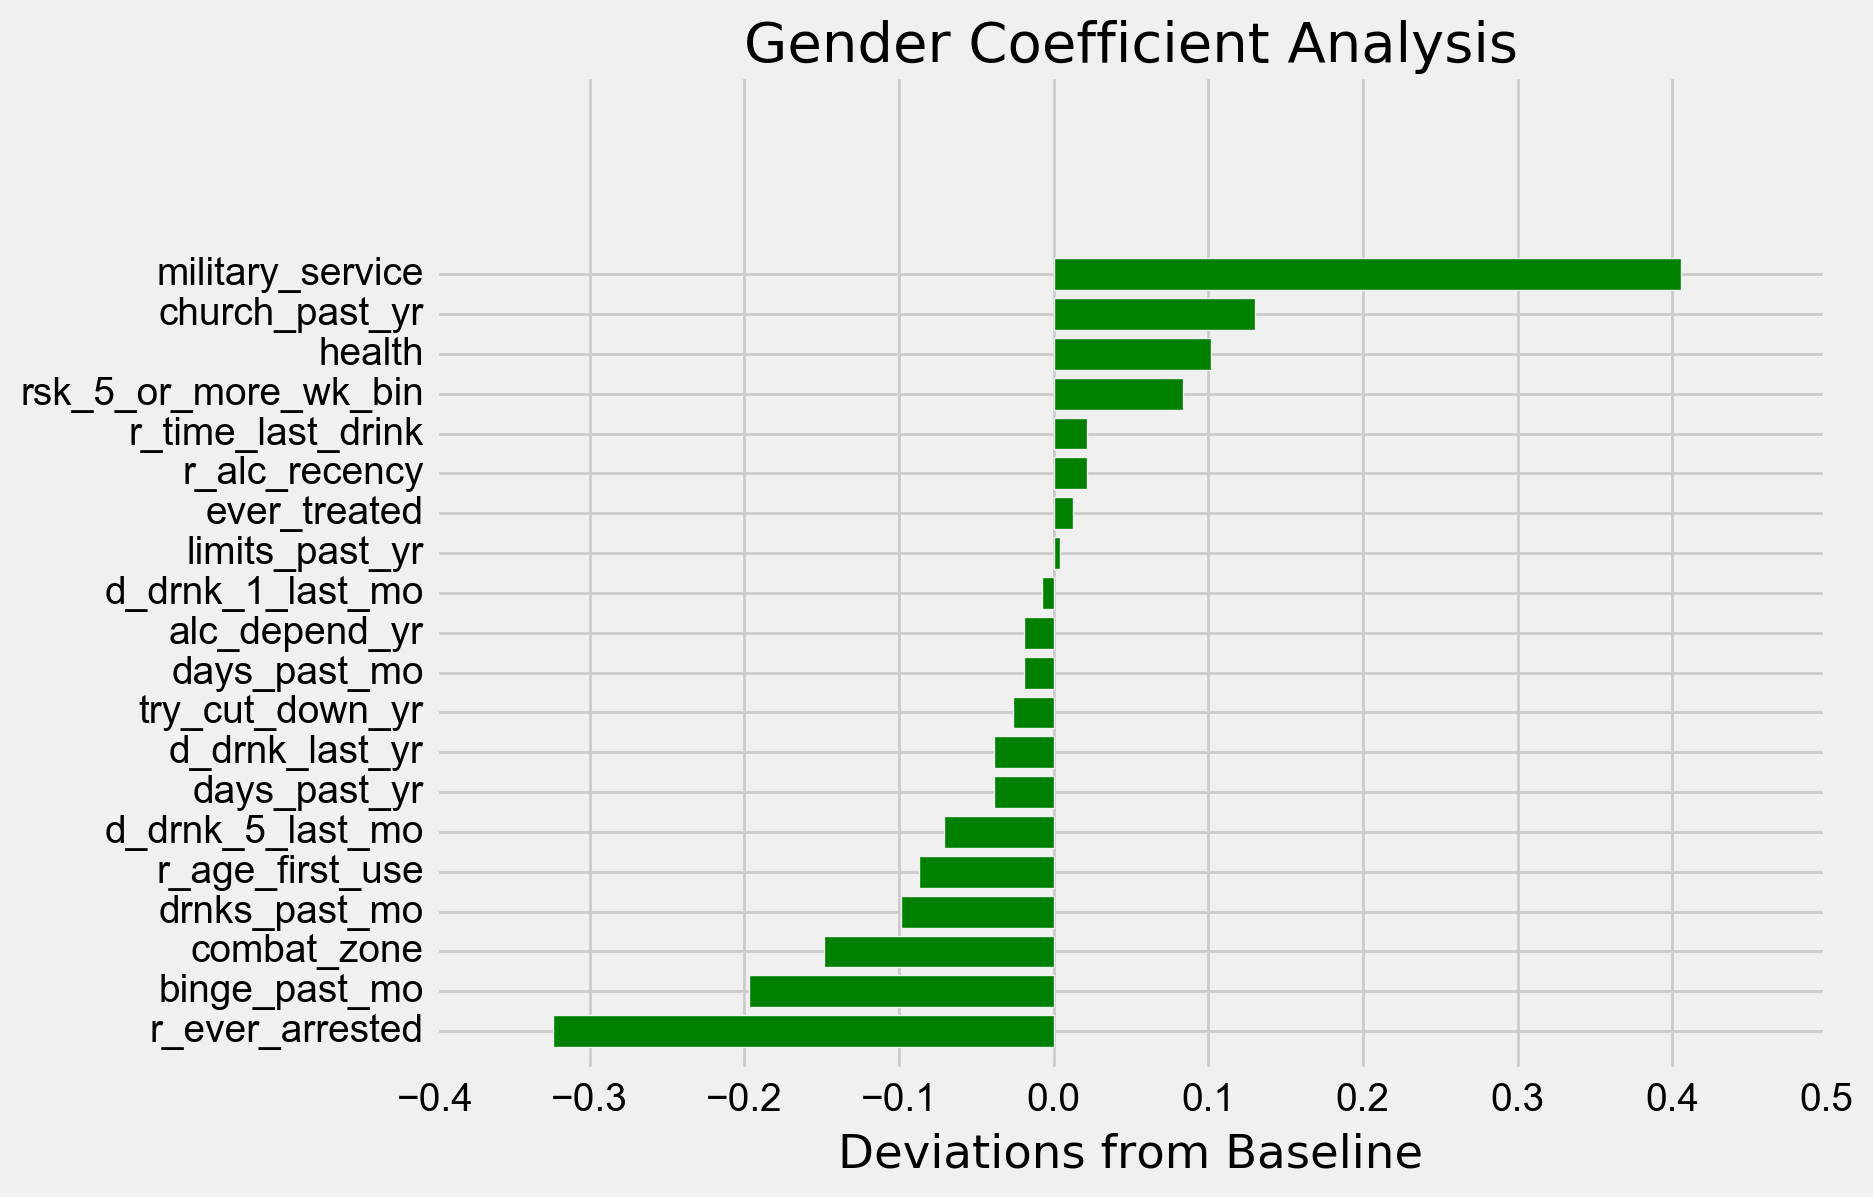

In [473]:
######################################################################################################### 
#  Display the coefficients                                                                             #
######################################################################################################### 
#
plt.rcdefaults()

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Example data
coefs_to_plot = (coefs_vars.variable)
y_pos = np.arange(len(coefs_to_plot))
difference = coefs_vars["coefs"]

ax.barh(y_pos, difference, align='center',
       color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(coefs_to_plot)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Deviations from Baseline')
ax.set_title('Gender Coefficient Analysis')

#plt.show()

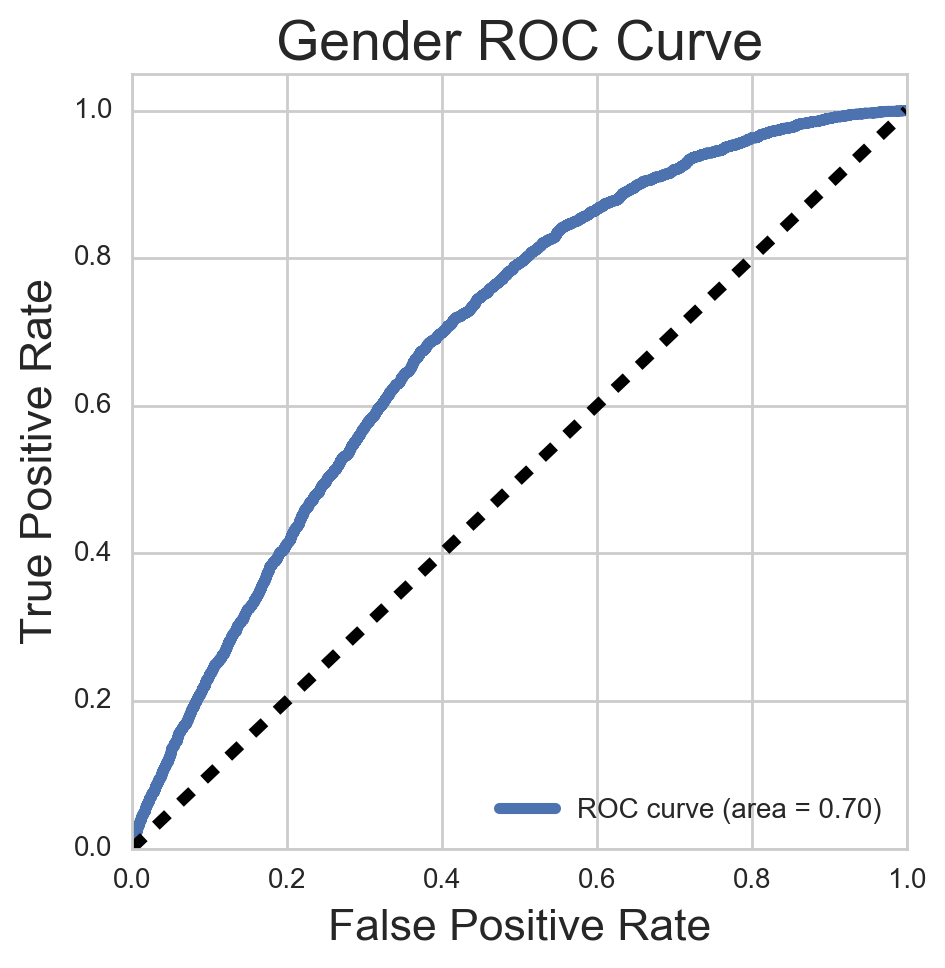

In [428]:
######################################################################################################### 
#  Display the ROC Curve                                                                                #
######################################################################################################### 
#

# # Get out the predicted probabilities for the X observation matrix
y_pp = gender_prob_predictions[:, 1] 

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
#fpr, tpr, _ = roc_curve(y, y_pp[:, 1])
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Gender ROC Curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [1067]:
######################################################################################################### 
# Predicting if a survey participant is younger than 30 years old                                       # 
#########################################################################################################

In [474]:
######################################################################################################### 
#  Select the target variable                                                                           #
######################################################################################################### 
#
target_variable = "age_bin"
target_classes = alcohol_final_age[target_variable].unique().tolist()

In [475]:
target_classes

[0, 1]

In [476]:
alcohol_final_age['age_bin'].value_counts()

0    16738
1    14162
Name: age_bin, dtype: int64

In [477]:
######################################################################################################### 
#  Index the target variable                                                                            #
######################################################################################################### 
#
alcohol_final_age[target_variable] = alcohol_final_age[target_variable].map(lambda value: target_classes.index(value))

/Users/jspath/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [478]:
######################################################################################################### 
#  Set up Patsy with target, predictors and parmameters                                                 #
######################################################################################################### 
#
y, X = dmatrices(target_variable + """ ~ military_service + combat_zone + try_cut_down_yr + r_time_last_drink + 
                                    d_drnk_last_yr + d_drnk_1_last_mo + d_drnk_5_last_mo + r_alc_recency + 
                                    health +
                                    days_past_yr + days_past_mo + r_age_first_use + binge_past_mo + drnks_past_mo +
                                    rsk_5_or_more_wk_bin + limits_past_yr + alc_depend_yr + r_ever_arrested + ever_treated +
                                    church_past_yr - 1""", data = alcohol_final, return_type="dataframe")

In [479]:
######################################################################################################### 
#  Invoke Patsy                                                                                         #
######################################################################################################### 
#
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [480]:
######################################################################################################### 
#  Define the training and testing variables                                                            #
######################################################################################################### 
#
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.33, random_state=42)
y_train = y_train.values.ravel()#fpr, tpr, _ = roc_curve(y, y_pp[:, 1])
y_test = y_test.values.ravel()

In [481]:
######################################################################################################### 
#  Test #1 - what is the mean of the target variable                                                    #
######################################################################################################### 
#
1. - np.mean(y_test)

0.53829557713052867

In [482]:
######################################################################################################### 
#  Instantiate and set up parameters for stachastic gradiant desc                                       #
######################################################################################################### 
#
params = {
    'loss':['log'],
    'penalty':['l2'],
    'alpha':np.logspace(-4,4,200)
}

sgdc = SGDClassifier()
sgdc_gs = GridSearchCV(sgdc, params, cv=5, verbose=1)

In [483]:
######################################################################################################### 
#  Fit the model                                                                                        #
######################################################################################################### 
#
sgdc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   12.7s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   15.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l2'], 'loss': ['log'], 'alpha': array([  1.00000e-04,   1.09699e-04, ...,   9.11589e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [484]:
######################################################################################################### 
# The age model is showing significant peforman                                                         # 
#########################################################################################################
print sgdc_gs.best_params_
best_model = sgdc_gs.best_estimator_
print best_model.score(X_test, y_test)

{'penalty': 'l2', 'alpha': 0.014820207057988586, 'loss': 'log'}
0.652741002256


In [485]:
######################################################################################################### 
#  Predict the model                                                                                    #
######################################################################################################### 
#
age_predictions = best_model.predict(X_test)
age_prob_predictions = best_model.predict_proba(X_test)
#alcohol_final_gender['X_test'] = gender_predictions

In [486]:
######################################################################################################### 
#  Show the classification report                                                                       #
######################################################################################################### 
#
print classification_report(gender_predictions, y_test)

             precision    recall  f1-score   support

        0.0       0.32      0.53      0.40      3347
        1.0       0.67      0.46      0.54      6850

avg / total       0.55      0.48      0.50     10197



In [487]:
######################################################################################################### 
#  Look at model coefficients                                                                           #
#  Take the model and extract the coefficients like so:                                                 #
######################################################################################################### 
#
model_coefs = best_model.coef_[0]
print model_coefs.shape

(20,)


In [488]:
######################################################################################################### 
#  Put the coefficients and the variables in a dataframe together:                                      #
######################################################################################################### 
#
coefs_vars = pd.DataFrame({
        'coefs':model_coefs,
        'variable':X.columns
    })

In [489]:
######################################################################################################### 
#  Put the absolute value of the coefficients in the dataframe, that way you can sort the               #
#  dataframe by the magnitude of the coefficients.                                                      #
######################################################################################################### 
#
coefs_vars['abs_coefs'] = np.abs(coefs_vars.coefs)

In [490]:
######################################################################################################### 
#  Sort the dataframe by the absolute value of the coefficients to see what is most impactful           #
#  (positive OR negative).                                                                              #
######################################################################################################### 
#
coefs_vars.sort_values('abs_coefs', ascending=False, inplace=True)
coefs_vars.head(10)

,coefs,variable,abs_coefs
12,-0.335948,binge_past_mo,0.335948
5,0.330231,d_drnk_1_last_mo,0.330231
10,-0.314633,days_past_mo,0.314633
0,-0.311950,military_service,0.311950
8,0.264042,health,0.264042
3,-0.236735,r_time_last_drink,0.236735
7,-0.236735,r_alc_recency,0.236735
16,-0.212814,alc_depend_yr,0.212814
19,0.182308,church_past_yr,0.182308
11,-0.164452,r_age_first_use,0.164452


In [491]:
######################################################################################################### 
#  Also sort by the original `coefs` columns if you want to see the most positive or the most negative  #
######################################################################################################### 
#
coefs_vars.sort_values('coefs', ascending=False, inplace=True)
coefs_vars.head()

,coefs,variable,abs_coefs
5,0.330231,d_drnk_1_last_mo,0.330231
8,0.264042,health,0.264042
19,0.182308,church_past_yr,0.182308
4,0.138123,d_drnk_last_yr,0.138123
9,0.138123,days_past_yr,0.138123


In [492]:
coefs_vars.tail()

,coefs,variable,abs_coefs
7,-0.236735,r_alc_recency,0.236735
3,-0.236735,r_time_last_drink,0.236735
0,-0.311950,military_service,0.311950
10,-0.314633,days_past_mo,0.314633
12,-0.335948,binge_past_mo,0.335948


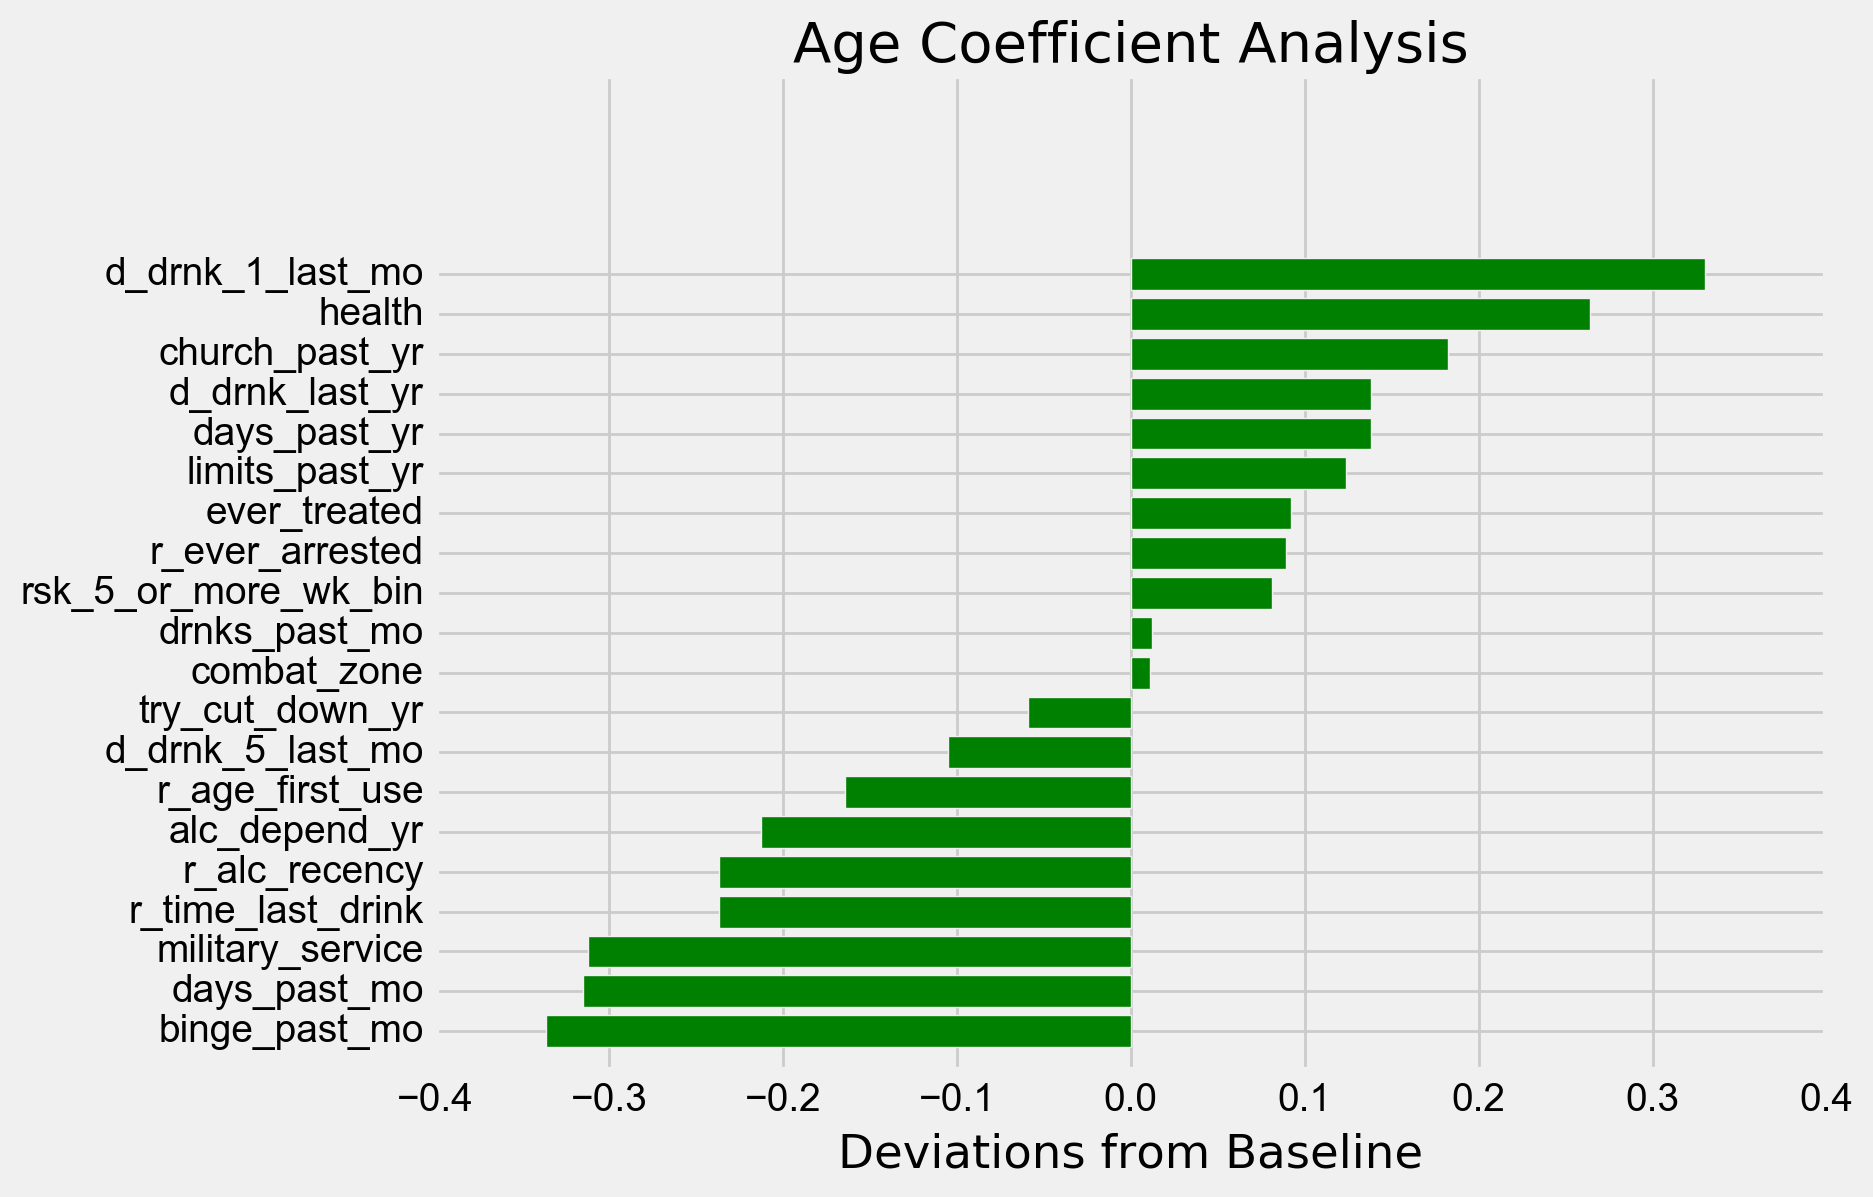

In [493]:
######################################################################################################### 
#  Display the coefficients                                                                             #
######################################################################################################### 
#
plt.rcdefaults()

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Example data
coefs_to_plot = (coefs_vars.variable)
y_pos = np.arange(len(coefs_to_plot))
difference = coefs_vars["coefs"]

ax.barh(y_pos, difference, align='center',
       color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(coefs_to_plot)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Deviations from Baseline')
ax.set_title('Age Coefficient Analysis')

#plt.show()

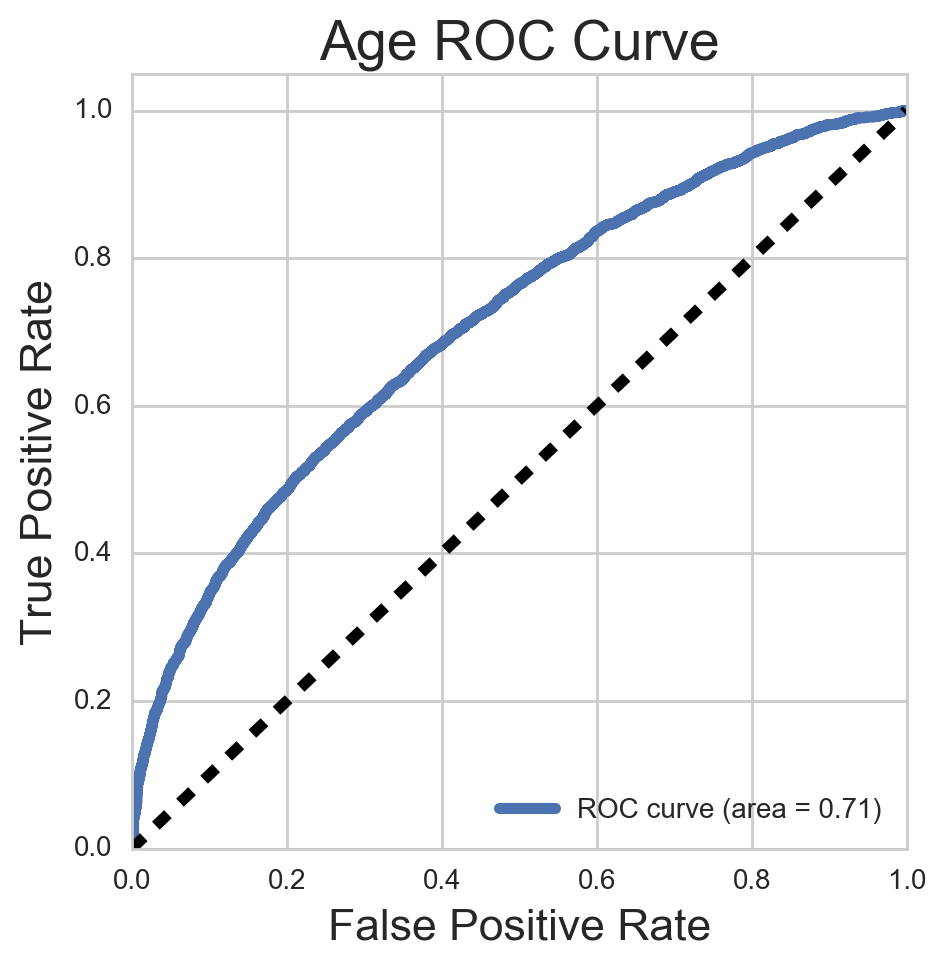

In [375]:
######################################################################################################### 
#  Display the ROC Curve                                                                                #
######################################################################################################### 
#
# # Get out the predicted probabilities for the X observation matrix
y_pp = age_prob_predictions[:, 1] 

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
#fpr, tpr, _ = roc_curve(y, y_pp[:, 1])
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Age ROC Curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

In [373]:
plt.savefig('/Users/jspath/Desktop/DSI-SF-4-jspath9/projects/capstone/plots/age_roc.png',transparent=True)